# Numeriek oplossen van differentiaalvergelijkingen

## 1. Wat is een differentiaalvergelijking?

Een gewone vergelijking kennen we allemaal: een gelijkheid met één of meer onbekenden (_x_, _y_, ...). Je leerde ondertussen al tal van technieken om speciale types vergelijkingen 'op te lossen', dat wil zeggen, één of meerdere waarden of oplossingen te vinden voor de onbekende(n). Zo kan je voor een tweedegraadsvergelijking de discriminantformule gebruiken.

Daarnaast ben je al goed vertrouwd met het begrip 'functie'. Veeltermfuncties, rationale, irrationale, goniometrische en cyclometrische functies heb je in wiskunde reeds uitgebreid bestudeerd. In wiskunde duidde je ze steeds aan met de notatie _f(x)_, maar in andere wetenschappelijke disciplines worden de afhankelijke en onafhankelijke variabelen met betekenisvolle grootheden aangeduid. Wanneer je bijvoorbeeld wilt weten hoe de temperatuur evolueert in de tijd, dan bestudeer je eigenlijk de functie _T(t)_.

Maar wat als we die twee cruciale begrippen uit wiskunde combineren? Wat als de gelijkheid geen informatie geeft over een onbekend getal, maar over een onbekende functie _f(x)_. Een oplossing is dan geen getal, maar een functievoorschrift (bijvoorbeeld $f(x) = \sin x$). We gaan op zoek naar het voorschrift _f(x)_ dat voldoet aan de 'functionaalvergelijking'.

Naast de onbekende functie _f(x)_ komen in toepassingen vaak de eerste en tweede afgeleide voor van _f(x)_. In dat geval spreken we van een **differentiaalvergelijking**.

## 2. Discretisatie

### 2.1. Discretisatie van een functie

Vóór we verder onderzoeken hoe we differentiaalvergelijkingen kunnen oplossen — gebruikmakend van de computer — is het belangrijk om te wijzen op het discrete karakter van computers. We nemen hieronder als voorbeeld de tweedegraadsfunctie
$$
\boxed{f(x)=x^2-3x+1}.
$$

<IPython.core.display.Javascript object>


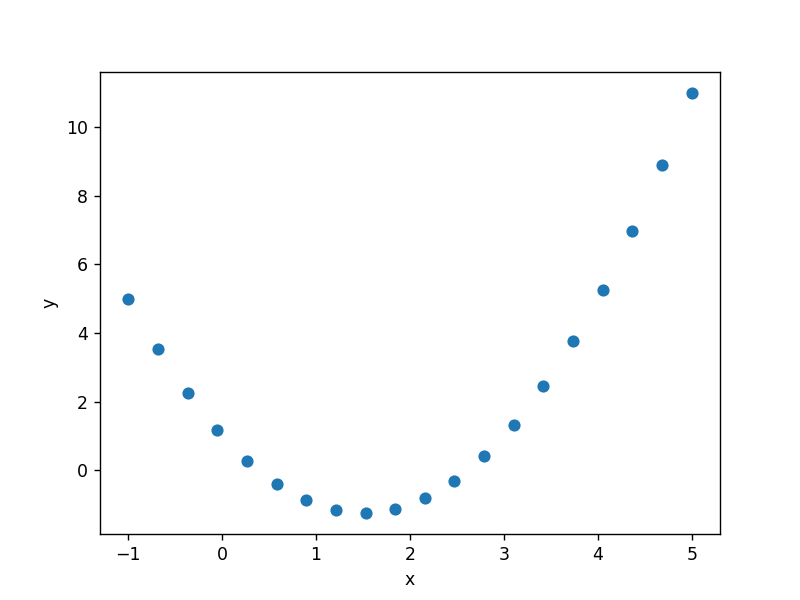

In [13]:
# we gebruiken matplotlib om een grafiek te tekenen
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

# voorschrift van de functie
def f(x):
    y = x**2 - 3*x + 1
    return y

# deel het interval [-1, 5] op in 20 x-waarden
xwaarden = np.linspace(-1,5,20)

# bereken voor elke x-waarden de bijhorende waarde f(x) en voeg toe aan de lijst met y-waarden
ywaarden = []
for x in xwaarden:
    ywaarden.append( f(x) )

# maak een puntenwolk met de coördinaten (x,y)
fig, ax = plt.subplots()
ax.scatter( xwaarden, ywaarden )
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

Binnen de wiskunde is de grafiek van de functie $f(x)=x^2-3x+1$ een continue, vloeiende kromme. Voor élke x-waarde bestaat er een unieke y-waarde. Bij de x-waarde 3.14 hoort bijvoorbeeld de y-waarde 1.4396.

Computers kunnen echter maar een eindig of discreet aantal punten tekenen, waar je — soms met enige verbeelding — een doorlopende kromme in kan zien. 
De grafiek die wordt getekend door onze computer is duidelijk geen continue kromme, maar een opeenvolging van discrete punten waarin je — met enige verbeelding — een parabool kan zien. In de x-waarde 3.14 kunnen we op de grafiek geen functiewaarde aflezen, we kunnen enkel een schatting maken door het punt te beschouwen dat het dichtst in de buurt komt. De reden dat de computer geen vloeiende lijn toont, is uiteraard omdat deze in theorie bestaat uit een oneindig aantal punten. Om al deze punten te tekenen, zou een computer dan ook oneindig lang bezig zijn. Een computer werkt dus **altijd** discreet, door zich te beperken zich tot een eindig aantal punten.

Nu kan je denken: 'in de code hierboven werd ervoor gekozen om slechts 20 punten te tonen. Waarom zo weinig?' Verhoog het aantal gerust, maar hoe groot je het aantal punten ook kiest, het lost nooit het eigenlijke probleem op. De grafiek zal altijd uit een eindig aantal punten bestaan.

Voor een programmeur heeft **discretisatie** verschillende gevolgen, waarvan er één telkens terugkomt. Een programmeur is gedoemd om altijd de afweging te maken tussen:

- het tekenen van voldoende punten kiezen om detail te bekomen;
- of het tekenen van te veel punten, wat leidt tot lange wachttijden. 

We geven een voorbeeld van een reëel gevolg van deze afweging. Een weersvoorspellingsmodel simuleert het weer in supercomputers, door de volledige atmosfeer van de aarde in miljarden kubusjes te verdelen. Op elk van de hoekpunten van die kubusjes worden berekeningen uitgevoerd, om de zogenaamde [Navier-Stokes-vergelijkingen](https://en.wikipedia.org/wiki/Navier%E2%80%93Stokes_equations) (een drietal differentiaalvergelijkingen!) waaraan de luchtstromen voldoen, op te lossen. In totaal worden via die complexe berekeningen temperatuur, druk, wind en vele andere meteorologische variabelen voorspeld, stapje voor stapje vooruit in de tijd. Ook al gebeuren die berekeningen door supercomputers, dan nog moet de weerman of -vrouw ten allen tijde vermijden dat de berekeningen té lang duren. Niemand wil immers 24 uur wachten op een voorspelling voor deze namiddag. Lange wachttijden kunnen we perfect vermijden door minder kubusjes te kiezen, maar minder kubusjes leiden tot een minder nauwkeurige voorspelling.

### 2.2. Discretisatie van de afgeleide functie

Neem opnieuw de bovenstaande functie met als voorschrift $f(x)=x^2-3x+1$ en neem aan dat we hiervan de afgeleide in $x=1$ willen bepalen. We noteren dit met $\frac{df(1)}{dx}$, wat identiek is aan $Df(1)$ of $f'(1)$. Aan de hand rekenregels kan je de afgeleide van deze simpele veeltermfunctie uiteraarde snel berekenen: de afgeleide functie wordt $\frac{df(x)}{dx} = 2x-3$ en evaluatie in $x=1$ levert $\frac{df(1)}{dx} = -1$.

Wanneer de gekende rekenregels falen, moeten we terugvallen op de definitie voor de afgeleide in een punt, als limiet van het differentiequotiënt:
$$
\boxed{\frac{df(a)}{dx} = \lim_{x \to a} \frac{f(x) - f(a)}{x-a}}.
$$

Hiermee kan de afgeleide in $x=1$ ook bepaald worden, hetzij via een iets langere weg:
$$
\begin{align*}
D f(1) & = \lim_{x \to 1} \frac{f(x) - f(1)}{x-1} \\
       & = \lim_{x \to 1} \frac{x^2-3x+1 - (-1)}{x-1} \\
       & = \lim_{x \to 1} \frac{x^2-3x+2}{x-1} \\
       & = \lim_{x \to 1} \frac{(x-2) (x-1)}{x-1} \\
       & = \lim_{x \to 1} \ (x-2) \\
       & = -1
\end{align*}
$$

Wanneer je deze definitie begrijpt en kan gebruiken, ben je in staat om een nieuwe, complexe probleemsituatie aan te pakken. Voor heel wat functies zijn rekenregels namelijk te complex. Als jouw baas je later de taak geeft om een functie af te leiden, dan luidt jouw antwoord hopelijk niet: 'oei, daarvoor heb ik geen regeltje geleerd'. Het is duidelijk: rekenregels zijn er voor wiskundeboeken, niet voor moeilijke problemen. Let op: we beweren niet dat voor zulke complexe functies de limietdefinitie eenvoudiger is. Ze kan wel als inspiratie dienen om afgeleiden te berekenen. We kunnen deze definitie namelijk discretiseren, zodat we de computer aan het werk kunnen zetten om afgeleiden te berekenen.

Uiteraard kan een computer een waarde $x$ niet willekeurig dicht laten naderen tot $a$ om de afgeleide $\frac{df(a)}{dx}$ te berekenen. De computer kan namelijk

Er is echter een venijnig addertje in de definitie voor afgeleides, die vooral problematisch is voor computers: de limiet. In de wiskunde is het perfect mogelijk om een willekeurige waarde _x_ op een continue functie geleidelijk te laten naderen tot _a_ om de afgeleide $\frac{df(a)}{dx}$ te berekenen. Voor een discrete functie (denk terug aan de grafiek hierboven) is dit onmogelijk: je kan onmogelijk dichter naderen dan het dichtstbijzijnde punt links of rechts van het punt _a_.

<IPython.core.display.Javascript object>


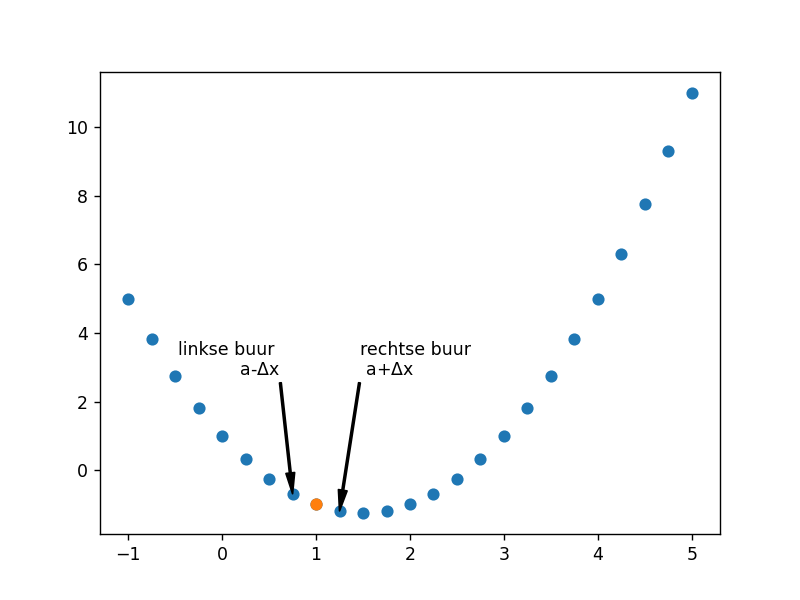

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    y = x**2-3*x+1
    return y

a = 1
xwaarden = np.linspace(-1,5,25)
dx = xwaarden[1] - xwaarden[0]
ywaarden = []
for x in xwaarden:
    ywaarden.append( f(x) )

fig, ax = plt.subplots()
ax.scatter(xwaarden, ywaarden)
ax.scatter([a],[f(a)])
ax.annotate('linkse buur \n a-$\Delta$x',
            xy=(a-dx, f(a-dx)),
            xytext=(0.35, 0.4),
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', width=1, headwidth=5),
            horizontalalignment='right',
            verticalalignment='center')
ax.annotate('rechtse buur \n a+$\Delta$x',
            xy=(a+dx, f(a+dx)),
            xytext=(0.45, 0.4),
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', width=1, headwidth=5),
            horizontalalignment='left',
            verticalalignment='center')
plt.show()

Naderen we van rechts naar het punt bij _a_, dan hoort de dichtstbijzijnde buur bij $a+\Delta x$ . In de discrete definitie benaderen we limiet door het differentiequotiënt over het interval $[a, a+\Delta x]$:
$$
\boxed{\frac{df(a)}{dx} \approx \frac{\Delta f(a)}{\Delta x} = \frac{f(a+\Delta x) - f(a)}{(a+ \Delta x)-a} = \frac{f(a+\Delta x) - f(a)}{\Delta x}}
$$

Wanneer we zodadelijk deze discrete definitie uitwerken, spreken we van **voorwaartse differentie**:
- 'differentie' ter vervanging van afgeleide, om te verduidelijken dat we met een discrete functie werken en een benaderde oplossing zoeken met de computer;
- 'voorwaarts' omdat bovenstaande definitie gebruikmaakt van de rechtse buur. Ook achterwaartse differenties bestaan. (Kan je hiervoor een discrete definitie opschrijven?)

Nog één opmerking voor we concreet de definitie toepassen op het voorbeeld. In vaktermen wordt $\Delta x$ de **stapgrootte** genoemd. Deze wordt door de gebruiker zelf gekozen, door meer of minder discrete punten te beschouwen. Hoe meer punten je tekent op de grafiek van de functie, hoe kleiner de stapgrootte automatisch wordt. Een te grote stapgrootte is echter geen goed idee. Kun je zelf uitleggen waarom? Test in onderstaande code hoe het antwoord na voorwaartse differentiatie verandert wanneer je de functie uit meer/minder punten laat bestaan.

In [16]:
#==================================#
#=== VOORWAARTSE DIFFERENTIE ===#
#==================================#

import matplotlib.pyplot as plt
import numpy as np

def f(x):
    y = x**2-3*x+1
    return y

a = 1
xwaarden = np.linspace(-1,5,100)
dx = xwaarden[1] - xwaarden[0]
ywaarden = []
for x in xwaarden:
    ywaarden.append( f(x) )

afgeleide_in_a = (f(a+dx) - f(a)) / dx

print( 'De afgeleide in a=', a, 'is bij benadering gelijk aan', afgeleide_in_a)

De afgeleide in a= 1 is bij benadering gelijk aan -0.9393939393939363


**OPDRACHT 1** Kopiëer bovenstaande code naar de lege codecel hieronder en implementeer de definitie van achterwaartse differentie. Zorg ervoor dat jouw antwoord op minstens 4 cijfers na de komma nauwkeurig is.

In [17]:
#==================================#
#== ACHTERWAARTSE DIFFERENTIATIE ==#
#==================================#




## 3. De methode van Euler
### 3.1. Tekenen van een discrete oplossing

Nu we een methode hebben gevonden om afgeleiden van eender welke functie te benaderen met een computer, herleggen we de focus naar het oplossen van een differentiaalvergelijking. Merk op dat je in een gewone vergelijking met een onbekende _x_, steeds een gok kan maken en deze kan bijstellen. In een vergelijking met een onbekende functie _f(x)_ lijkt het onbegonnen werk om de computer voorschriften te laten uitproberen: hoe zou je alle mogelijke voorschriften met $x$, $x^2$, $\sin x$ ... uitproberen?

We zullen er niet in slagen om de computer een voorschrift te laten bepalen, maar het zal wel mogelijk zijn om de grafiek van een (discrete) oplossing _f(x)_ te tekenen. Neem aan dat de differentiaalvergelijking gegeven is door
$$
y' = f(y).
$$
De afgeleide in een bepaald punt $P\big(a, f(a)\big)$ geeft ons de richting van de raaklijn. In de buurt van dit punt, is de raaklijn een goede benadering van de grafiek van _f(x)_. We kunnen dus van een gegeven startpunt één stap opzij zetten langs de raaklijn, via de formule

$$\frac{df(a)}{dx} \approx \frac{f(a+\Delta x) - f(a)}{\Delta x} \qquad\Longleftrightarrow\qquad f(a+\Delta x) \approx f(a) + \Delta x \cdot \frac{df(a)}{dx}.$$

Dit wordt de **methode van Euler** genoemd en het is de eenvoudigste manier om een differentiaalvergelijking numeriek op te lossen. De benadering is uiteraard nauwkeuriger naarmate de stapgrootte $\Delta x$ kleiner is.

<IPython.core.display.Javascript object>


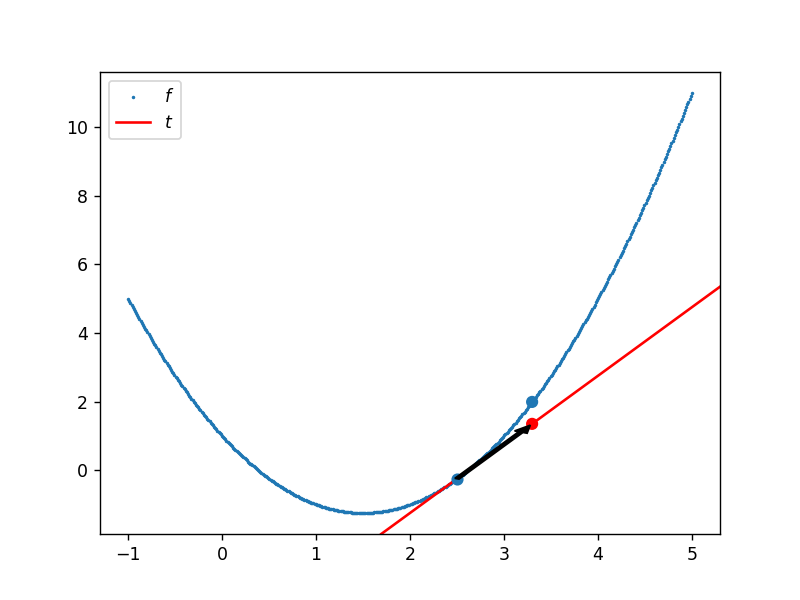

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    y = x**2-3*x+1
    return y

a = 2.5
xwaarden = np.linspace(-1,5,500)
dx = 0.8
ywaarden = []
for x in xwaarden:
    ywaarden.append( f(x) )

fig, ax = plt.subplots()
ax.scatter(xwaarden, ywaarden, s=1, label='$f$')
ax.axline((a, f(a)), slope=2*a-3, color='r', zorder=1, label='$t$')

ax.scatter([a],[f(a)], color='C0', zorder=2)
ax.scatter([a+dx,a+dx],[f(a+dx),f(a)+(2*a-3)*dx], zorder=2, color=['C0','r'])
ax.arrow(a, f(a), dx*0.85, (2*a-3)*dx*0.85, color='k', width=0.05, zorder=2)

ax.legend()
plt.show()

### 3.2. Uitgewerkt voorbeeld: bevolkingsgroei

De huidige wereldbevolking bedraagt bij benadering 8 miljard 170 miljoen 610 duizend. We kennen deze waarde toe aan de beginsituatie $N_0$. Per jaar komt daar gemiddeld 1.1074\% bij. Deze gemiddelde bevolkingsgroei per jaar noemen we de variabele $k$. We schrijven een programma dat de populatie voorspelt op een willekeurig toekomstig tijdstip. Daarvoor kunnen we de populatiegroei beschrijven met behulp van volgende differentiaalvergelijking:
$$
\frac{dN(t)}{dt} = k N(t)
$$
met $N(t)$ de gezochte functie die de populatie beschrijft in functie van de tijd.

De analytische oplossing van de differentiaalvergelijking, in de vorm van een functievoorschrift, laten we achterwege. Daarvoor hebben we een aantal nieuwe wiskundige technieken nodig. In plaats daarvan gaan we op zoek naar een numerieke oplossing. De verkregen functie zal uiteraard _gediscretiseerd_ zijn en bestaan uit een eindig aantal punten, gekozen x-waarden waarvan de functiewaarde wordt berekend. Op de x-as staat in deze context de tijd _t_. Naast de aanmaak van enkele variabelen beschreven in de opgave, starten we daarom alvast met het maken van een discrete tijd-lijst.

In [89]:
import numpy as np

#==================================#
#====    AANMAAK VARIABELEN    ====#
#==================================#

N0        = 8_170_610_000          # bevolking in augustus 2024
k         = 0.011074               # gemiddelde bevolkingsgroei per jaar
dt        = 1                      # tijdsstap in jaar, verklein deze waarde voor een nauwkeurigere oplossing
tijdlijst = np.arange(0,10,dt)     # lijst van 0 tot 10 jaar in stappen van delta t jaar


Daarna noteren we een discrete variant van de gegeven differentiaalvergelijking. Deze stap voer je uit op een blad papier.
$$
\begin{align*}
\frac{\Delta N(t)}{\Delta t}      & = k N(t) \\
\frac{N(t_1) - N(t_0)}{t_1 - t_0} & = k N(t_0) \\
N(t_1) - N(t_0)                   & = k N(t_0) \Delta t \\
N(t_1)                            & = N(t_0) + k N(t_0) \Delta t \\
\end{align*}
$$

Deze laatste vergelijking is ontzettend interessant: het geeft de populatie op een tijdstip $t_1$, precies één tijdstap later dan de huidige tijd $t_0$ waarop we de populatie kennen: $N(t_0) = N_0$. Zo schrijven we:
$$\boxed{N_1 = N_0 + k N_0\Delta t}$$

Eens $N_1$ berekend is, kunnen we een nieuwe tijdstap $N_2$ berekenen, daaruit $N_3$ enzovoort tot we de gewenste eindtijd hebben bereikt. Dit is hieronder in een for-loop geïmplementeerd. Let ook goed op het gebruik van $N_0$ en $N_1$ als enige variabelenamen, $N_2$, $N_3$... worden nooit gemaakt. Zie je hoe we dat vermijden?

In [94]:
import numpy as np

#==================================#
#====    AANMAAK VARIABELEN    ====#
#==================================#

N0        = 8_170_610_000          # bevolking in augustus 2024
k         = 0.011074               # gemiddelde bevolkingsgroei per jaar
dt        = 1                      # tijdstap in jaar, verklein deze waarde voor een nauwkeurigere oplossing
tijdlijst = np.arange(0,10,dt)     # lijst van 0 tot 10 jaar in stappen van delta t jaar


#===================================#
#===  IMPLEMENTATIE DISCRETE DV  ===#
#===================================#

for t in tijdlijst:
    N1 = N0 + k*N0*dt
    N0 = N1


#===================================#
#=== PRINT POPULATIE OP 'T EINDE ===#
#===================================#

print( 'Na', tijdlijst[-1], 'jaar telt de wereld ongeveer', round(N0/1e9,2), 'miljard mensen.' )

Na 10 jaar telt de wereld ongeveer 9.12 miljard mensen.


Als laatste stap tekenen we de volledige oplossing van de differentiaalvergelijking in een N(t) grafiek. Daarvoor moet de for-loop worden aangepast, want het is noodzakelijk om alle tussentijdse populaties op te slaan in een lijst. Bestudeer de code hieronder om te begrijpen hoe we dat kunnen doen:

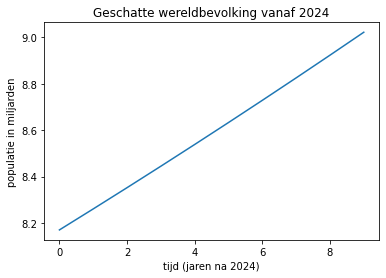

Na 9 jaar telt de wereld ongeveer 9.12 miljard mensen.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

#==================================#
#====    AANMAAK VARIABELEN    ====#
#==================================#

N0        = 8_170_610_000          # bevolking in augustus 2024
k         = 0.011074               # gemiddelde bevolkingsgroei per jaar
dt        = 1                      # tijdstap in jaar, verklein deze waarde voor een nauwkeurigere oplossing
tijdlijst = np.arange(0,10,dt)     # lijst van 0 tot en met 10 jaar in stappen van delta t jaar
populatie = []                     # voorlopig lege lijst met alle populatiegegeves op elke tijdstap

#===================================#
#===  IMPLEMENTATIE DISCRETE DV  ===#
#===================================#

for t in tijdlijst:
    populatie.append( N0/1e9 )      # voeg nieuwe populatie toe, in miljard
    N1 = N0 + k*N0*dt               # bereken populatie op de volgende tijdsstap
    N0 = N1                         #

#===================================#
#=== AANMAAK VAN DE N(t) GRAFIEK ===#
#===================================#

fig, ax = plt.subplots()
ax.plot(tijdlijst, populatie)
ax.set_title('Geschatte wereldbevolking vanaf 2024')
ax.set_xlabel( 'tijd (jaren na 2024)' )
ax.set_ylabel( 'populatie in miljarden' )
plt.show()

print( 'Na', tijdlijst[-1], 'jaar telt de wereld ongeveer', round(N0/1e9, 2), 'miljard mensen.' )

## 5. OEFENINGEN

### OEF 1: Groei van een konijnenpopulatie

Konijnen staan bekend om hun snelle populatiegroei: ze zijn jong vruchtbaar en planten zich snel voort. Beschouw een nieuwe populatie van 10 konijnen die wordt uitgezet in een groot natuurgebied. De konijnen hebben onbeperkt voedsel en planten zich voort met een gemiddelde jaarlijkse groei van 9%. Zoals in het bovenstaande voorbeeld wordt de populatiegroei door volgende differentiaalvergelijking gegeven. $N(t)$ stelt de konijnenpopulatie voor, $k$ is de gemiddelde jaarlijkse groei:
$$ \frac{dN(t)}{dt} = k N(t)$$

- Teken de evolutie van de konijnenpopulatie in het natuurgebied tussen 0 en 50 jaar.
- Bereken de populatie 50 jaar na het uitzetten van de eerste 10 konijnen.
- Controleer of jouw antwoord afhankelijk is van de gekozen tijdsstap.

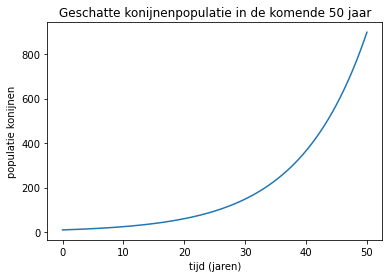

Na 49.99 jaar telt de konijnenpopulatie ongeveer 898 dieren.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

#==================================#
#====    AANMAAK VARIABELEN    ====#
#==================================#

N0        = 10                     # oorspronkelijk aantal konijnen
k         = 0.09                   # gemiddelde bevolkingsgroei per jaar
dt        = 0.01                   # tijdsstap in jaar, verklein deze waarde voor een nauwkeurigere oplossing
tijdlijst = np.arange(0, 50, dt)   # lijst van 0 tot 50 jaar in stappen van delta t jaar
populatie = []                     # voorlopig lege lijst met alle populatiegegeves op elke tijdstap

#===================================#
#===  IMPLEMENTATIE DISCRETE DV  ===#
#===================================#

for t in tijdlijst:
    populatie.append( N0 )          # voeg nieuwe populatie toe
    N1 = N0 + k*N0*dt           # bereken populatie op de volgende tijdsstap
    N0 = N1                         #

#===================================#
#=== AANMAAK VAN DE N(t) GRAFIEK ===#
#===================================#

fig, ax = plt.subplots()
ax.plot(tijdlijst, populatie)
ax.set_title('Geschatte konijnenpopulatie in de komende 50 jaar')
ax.set_xlabel( 'tijd (jaren)' )
ax.set_ylabel( 'populatie konijnen' )
plt.show()


#===================================#
#=== PRINT POPULATIE OP 'T EINDE ===#
#===================================#

print( 'Na',tijdlijst[-1],'jaar telt de konijnenpopulatie ongeveer',round(N0),'dieren.' )


### OEF 2: Radioactief verval

Xenon-135 is een radioactief element met een verval- of desintegratieconstante $\lambda$=0.0758 per uur. Wiskundig kunnen we de evolutie van de massa $^{135}$Xe als volgt schrijven:
$$ \frac{dm(t)}{dt} = -\lambda \cdot m(t)$$

Bovenstaande differentiaalvergelijking heeft een oplossing $m(t)$ die de massa radioactief materiaal in functie van de tijd weergeeft. Op een bepaald tijdstip is er in een laboratorium 10 mg $^{135}$Xe aanwezig. Schrijf een programma dat de evolutie van de massa $^{135}$Xe in de tijd voorspelt en weergeeft in een $m(t)$ grafiek.

### OEF 3: Afkoeling van een voorwerp

De snelheid waarmee de temperatuur $T$ van een warm voorwerp afneemt, is evenredig met het verschil tussen die temperatuur $T$ en de omgevingstemperatuur $T_0$:

$$ \frac{dT(t)}{dt} = -\alpha \cdot (T(t)-T_0)$$

Een bord hete soep van 90°C wordt in een kamer van 20°C geplaatst. In die situatie bedraagt $\alpha$=0.077 per minuut. Schrijf een programma dat de evolutie van de temperatuur van de soep weergeeft in een $T(t)$ grafiek.

### OEF 4: Wat gebeurt er met het geld op mijn spaarrekening?

Het geld dat je deze zomer met jouw vakantiejob verdiende (€2000), wil je graag op een spaarrekening plaatsen. Een bank belooft je een interestvoet van i=3,27% per jaar. De verandering van het kapitaal in de tijd wordt beschreven door de volgende differentiaalvergelijking:
$$ \frac{d K(t)}{d t} = i \cdot K(t) $$

Schrijf een programma dat de evolutie van het kapitaal weergeeft in een $K(t)$ grafiek.

### OEF 5: De groei van een pinguïnpopulatie

In oefening 1 (konijnenpopulatie) zagen we een voorbeeld van wat we **exponentiële groei** noemen. Hierbij neemt de groeisnelheid evenredig toe met de populatie. Hoe meer konijnen, des te sneller plant de populatie zich voort. Al vroeg in de negentiende eeuw bedacht de Belgische wiskundige Pierre Francois Verhulst (1804-1849) dat dit in de praktijk onmogelijk het complete verhaal kan zijn voor een groeiende populatie. Op een zeker moment raken de voorwaarden voor zulke ongebreidelde groei uitgeput, bijvoorbeeld door onvoldoende voedsel? Hij bedacht dat de evenredigheidsconstante $k$ moet verkleinen naarmate de populatie $N$ dichter in de buurt van een maximaal mogelijke populatie $M$ komt. Hij kwam met een nieuwe differentiaalvergelijking die deze **geremde groei** beschrijft:
$$ \frac{dN(t)}{dt} = c \cdot (M - N(t)) \cdot N(t) $$

Een voorbeeld. Het aantal dieren in een kolonie pinguïns op een afgelegen eiland schommelt al jaren rond de 3600. Onderzoekers gaan ervan uit dat dit de maximaal mogelijke populatie is. Na een grote milieuramp (een gecrashte olietanker) sterft tweederde deel van de populatie uit. Daarna lijkt de populatie zich weer snel te gaan herstellen met een groeifactor van 0.011% per jaar.

Schrijf een programma dat de evolutie van het aantal pinguins op het eiland weergeeft in een $N(t)$ grafiek tussen het moment van de ramp en 20 jaar later.

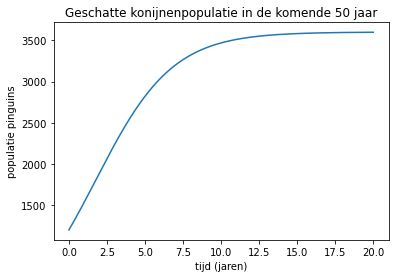

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#==================================#
#====    AANMAAK VARIABELEN    ====#
#==================================#

N0     = 1200     # bevolking in augustus 2024
c      = 0.00011  # gemiddelde groeifactor per jaar
M      = 3600     # maximaal mogelijke populatie

dt        = 0.01                   # tijdsstap in jaar, verklein deze waarde voor een nauwkeurigere oplossing
tijdlijst = np.arange(0, 20, dt)   # lijst van 0 tot 20 jaar in stappen van delta t jaar
populatie = []                     # voorlopig lege lijst met alle populatiegegeves op elke tijdstap



#===================================#
#===  IMPLEMENTATIE DISCRETE DV  ===#
#===================================#

for t in tijdlijst:
    populatie.append( N0 )      # voeg nieuwe populatie toe
    N1 = N0 + c*(M-N0)*N0*dt    # bereken populatie op de volgende tijdsstap
    N0 = N1                     #

#===================================#
#=== AANMAAK VAN DE N(t) GRAFIEK ===#
#===================================#

fig, ax = plt.subplots()
ax.plot(tijdlijst, populatie)
ax.set_title('Geschatte pinguïnpopulatie in de komende 20 jaar')
ax.set_xlabel( 'tijd (jaren)' )
ax.set_ylabel( 'populatie pinguins' )
plt.show()


### OEF 6: Verspreiding van een ziekte

In een land met een bevolkingsgrootte van 10 miljoen breekt een besmettelijke ziekte uit. Op zeker moment is 0.1% van de bevolking besmet. Laat $B(t)$ het aantal besmette personen (in miljoenen) zijn afhankelijk van de tijd _t_ in jaren na dit moment. Onderzoekers stellen een model op waarin wordt aangenomen dat het aantal besmette personen toeneemt met een snelheid die op elk moment gelijk is met het product van het aantal besmette en het aantal niet besmette personen. Stel de differentiaalvergelijking op, discretiseer deze en schrijf een programma dat de evolutie van het aantal besmette personen weergeeft in een $B(t)$ grafiek.

### OEF 7a: Ik vlieg uit een vliegmachine...

Een parachutist met een massa 60 kg springt laat zich vanuit rust vallen uit een vliegtuig. Hij ondervindt dan de zwaartekracht $F_Z = m g$ naar beneden gericht en een luchtweerstandskracht $F_W = k v$ omhoog. Via de tweede wet van Newton (zie fysica 2e semester) vinden we volgende differentiaalvergelijking die de beweging van de parachutist beschrijft: 

$$ m \frac{dv(t)}{dt} = m g - k v(t) $$

Hierin is:
- $m$ = 60 kg de massa van de parachutist,
- $g$ = 9.81 m/s² de valversnelling,
- $k$ = 20 kg/s een weerstandsconstante,
- $v(t)$ de snelheid in m/s, evoluerend in de tijd
- $a(t)=\frac{dv(t)}{dt}$ de versnelling in m/s², evoluerend in de tijd.

Schrijf een programma dat de evolutie van de snelheid van de parachutist weergeeft in een $v(t)$ grafiek wanneer hij de parachute niet zou openen.

### OEF 7b: ...gelukkig heb ik een parachute

Beschouw opnieuw de situatie uit oefening 7a. Na één minuut opent de parachutist, waardoor de luchtweerstandsconstante drastisch verhoogt naar $k$=100 kg/s. Teken de evolutie van de volledige parachutesprong in een v(t) grafiek.

### OEF 8: In het natuurgebied lopen ook vossen rond

Veronderstel een gesloten gebied waar konijnen en vossen samen leven. De volledige konijnenpopulatie stellen we voor door $x(t)$, de volledige vossenpopulatie stellen we voor door $y(t)$. Om de evolutie van de konijnen- en vossenpopulatie te begrijpen (en te voorspellen), moeten we met volgende zaken rekening houden:
- De geboorte van nieuwe konijnen gebeurt zoals het exponentiële groeimodel uit het voorbeeld. Konijnen vinden altijd voldoende gras en kunnen zich zonder jagers ongebreideld voortplanten. De sterfte van konijnen is verwaarloosbaar ten opzichte van het hoge aantal geboortes. Als we de konijnenpopulatie voorstellen door $x(t)$, de verandering van ervan door $dx/dt$ en de groei wordt bepaald door een groeifactor $a$, dan zou:
$$ \frac{dx(t)}{dt} = a x(t)$$
- Door de aanwezigheid van vossen wordt de groei van de konijnenpopulatie echter tegengehouden. Hoeveel die groei wordt tegengehouden, dat hangt af van het aantal vossen (hoe meer vossen, hoe moeilijker de konijnenpopulatie kan groeien), maar ook van het aantal konijnen (hoe meer konijnen, des te gemakkelijker die ten prooi kunnen vallen aan de vossen). In ons model vermenigvuldigen we beide invloeden met elkaar en wegen die opnieuw met een constante, $b$ genaamd. Voegen we die bij bovenstaande term, bekomen we de totale verandering van de konijnenpopulatie:
$$ \boxed{\frac{dx(t)}{dt} = a x(t) - b x(t) \cdot y(t)}$$
Let hierbij zeker op het minteken dat verduidelijkt dat de tweede term geen groei (+) maar wel een afname (-) teweegbrengt in de konijnenpopulatie.


- Daarnaast beschouwen we de verandering van de vossenpopulatie. In tegenstelling tot de konijnen, is sterfte binnen de vossenpopulatie wel van belang. We introduceren hiervoor alvast een eerste negatieve term in de differentiaalvergelijking:
$$ \frac{dy(t)}{dt} = -c y(t)$$
- De groei van de vossenpopulatie is uiteraard afhankelijk van het aantal vossen (hoe meer vossen, des te sneller die zich kunnen voortplanten), maar ook van het aantal konijnen (als er te weinig konijnen zijn, heeft de vossenpopulatie te weinig voedsel en zullen de vossen ook geen nakomelingen krijgen). Gewogen met een groeifactor $d$ en toegevoegd aan de bovenstaande term wordt de verandering van de vossenpopulatie gegeven door:
$$ \boxed{\frac{dy(t)}{dt} = -c y(t) + d x(t) \cdot y(t)} $$

1. Discretiseer beide differentiaalvergelijkingen.
2. Schrijf een programma dat de evolutie van zowel de vossen als de konijnen weergeeft in een $x(t)$ en een $y(t)$ grafiek gedurende 25 jaar lang. Voeg ook een legende toe aan je figuur (volg één van de bovenstaande voorbeelden).
3. Schrijf een programma dat de konijnenpopulatie in functie van de vossenpopulatie toont in een $x(y)$ grafiek.

<IPython.core.display.Javascript object>


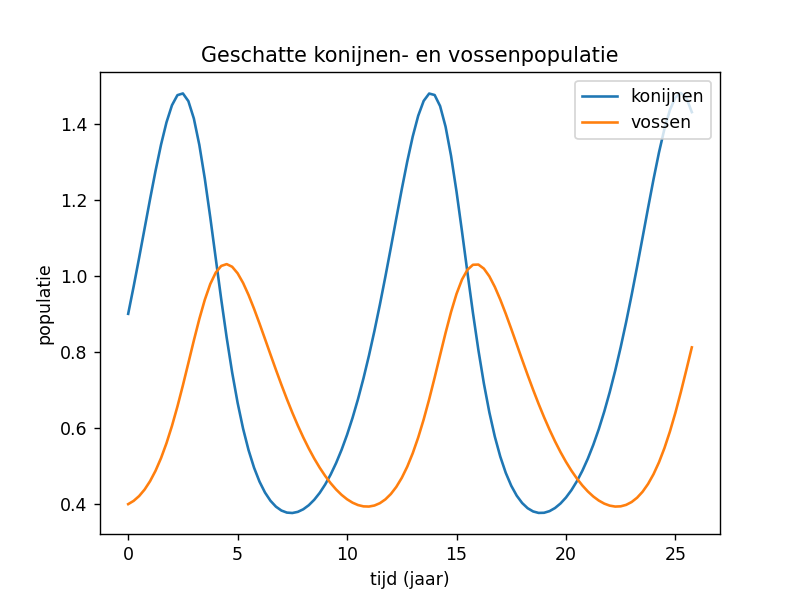

<IPython.core.display.Javascript object>


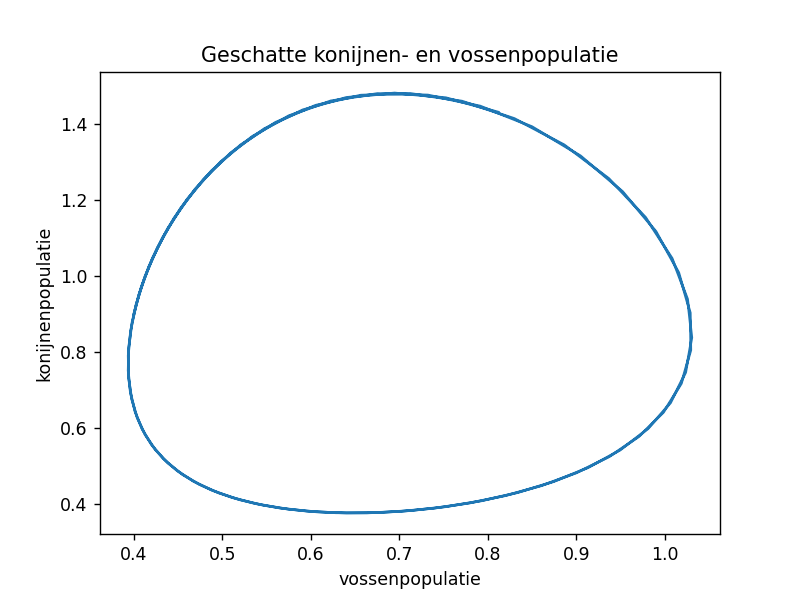

In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

a = 0.8
b = 1.2
c = 0.4
d = 0.5

x0 = 0.9
y0 = 0.4

dt        = 0.25                    # tijdstap in jaar
eindt     = 26                      # na eindt jaren
tijdlijst = np.arange(0, eindt, dt) # lijst van 0 tot eindt jaar in stappen van delta t jaar

prooien = []
jagers  = []
tijd    = []

for t in tijdlijst:
    # opslag van laatste waarde in lijst
    prooien.append(x0)
    jagers.append(y0)
    tijd.append(t)
    # numerieke diff vgl
    x1 = x0 + (a*x0 - b*x0*y0)*dt
    y1 = y0 + (-c*y0 + d*x1*y0)*dt
    # update na elke tijdstap
    x0 = x1
    y0 = y1


# tekenen van de grafiek
fig, ax = plt.subplots()
ax.plot(tijd, prooien, label='konijnen')
ax.plot(tijd, jagers, label='vossen')
ax.set_title('Geschatte konijnen- en vossenpopulatie')
ax.set_xlabel('tijd (jaar)')
ax.set_ylabel('populatie')
ax.legend(loc='upper right')
plt.show()

fig, ax = plt.subplots()
ax.plot(jagers, prooien)
ax.set_title('Geschatte konijnen- en vossenpopulatie')
ax.set_xlabel('vossenpopulatie')
ax.set_ylabel('konijnenpopulatie')
plt.show()

### OEF 9: Beweging van een massa aan een veer

Een veer heeft een veerconstante van _k_=5.0 N/m. Aan de veer wordt een massa van _m_=0.1 kg bevestigd. Vóór het experiment hangt het massa-veersysteem in rust. Nu trekken we de massa 0.20 meter uit zijn evenwichtspositie en laten die van daaruit zonder beginsnelheid los. Na het loslaten ondervindt de massa enkel de veerkracht $F_v = k x$. Via de tweede wet van Newton (zie fysica 2e semester) vinden we volgende differentiaalvergelijking die de beweging van de massa beschrijft: 

$$ m \frac{d^2x(t)}{dt^2} = -k \cdot x(t) $$

Hierin is:
- $m$ = 0.1 kg de massa,
- $k$ = 5.0 N/m de veerconstante,
- $x(t)$ de positie ten opzichte van de evenwichtsstand, evoluerend in de tijd
- $a(t)=\frac{dv(t)}{dt}=\frac{d^2x(t)}{dt^2}$ de versnelling in m/s², evoluerend in de tijd.

Omdat bovenstaande differentiaalvergelijking een afgeleide bevat van de tweede orde, is de discretisatie zoals hierboven beschreven niet mogelijk. Toch is er een slimme manier om dit probleem alsnog op te lossen. Daarvoor introduceren we een tweede differentiaalvergelijking en lossen die twee samen op:
$$
\begin{cases}
\frac{dx(t)}{dt} &= v(t) \\
\frac{dv(t)}{dt} &= -\frac{k}{m} \cdot x(t) \\
\end{cases}
$$

Schrijf een programma dat de evolutie van de uitwijking van de massa weergeeft in een $x(t)$ grafiek gedurende de eerste 5 seconden na het loslaten van de massa.

<IPython.core.display.Javascript object>


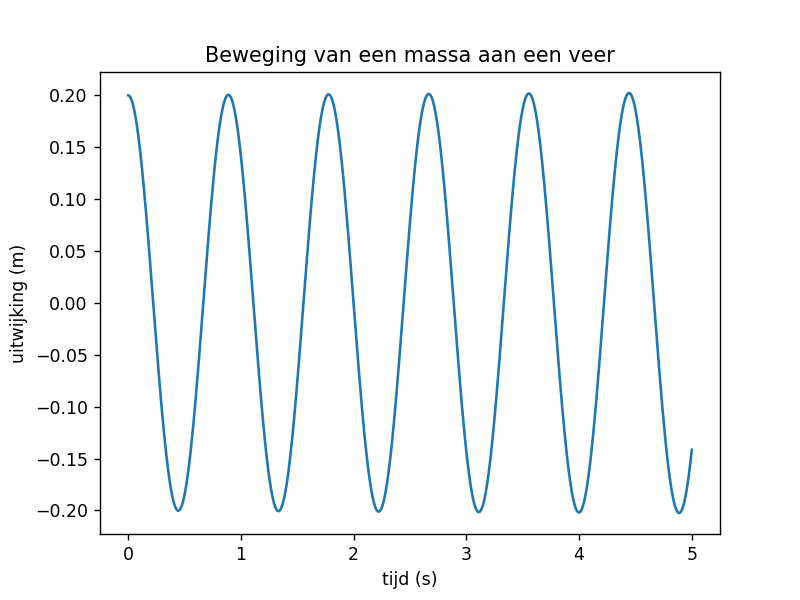

In [12]:
k = 5.0 # veerconstante (N/m)
m = 0.1 # massa (kg)

x0 = 0.2  # beginuitwijking in meter
v0 = 0  # beginsnelheid in m/s

dt     = 0.0001       # tijdsstap in seconden
eindt  = 5            # na eindt tijd

uitwijking = []
tijd = []

for t in np.arange(0, eindt, dt):
    # opslag van laatste waarde in lijst
    uitwijking.append(x0)
    tijd.append(t)
    v1 = v0 - (k/m)*x0*dt
    x1 = x0 + v0*dt
    # update na elke tijdstap
    x0 = x1
    v0 = v1


# tekenen van de grafiek
fig, ax = plt.subplots()
ax.plot(tijd,uitwijking)
ax.set_title('Beweging van een massa aan een veer')
ax.set_xlabel( 'tijd (s)' )
ax.set_ylabel( 'uitwijking (m)' )
plt.show()

### OEF 10: Concentratie van een opgeloste stof in de bodem

Een veld werd met een illegale pesticide bespoten. Om te weten hoe diep de bodem besmet is, zijn we geïnteresseerd in de concentratie van de stof $C(x)$ in functie van de diepte $x$. De oplossing kan worden gevonden uit volgende differentiaalvergelijking:
$$ \frac{d^2 C(x)}{d x^2} = C(x) $$

die onderhevig is aan twee voorwaarden:
- Aan de bodem is de concentratie van de stof 1 mol/l: $C(0)=1$.
- Op een diepte van 1 meter onder de bodem is er geen verandering van de concentratie meer: $\frac{d C(1)}{dx} = 0$.

Omdat bovenstaande differentiaalvergelijking opnieuw een afgeleide van de tweede orde bevat, trekken we de differentiaalvergelijking uiteen in twee aparte differentiaalvergelijkingen van orde één:
$$
\begin{cases}
\frac{dC(x)}{dx} &= V(x) \\
\frac{dV(x)}{dx} &= C(x) \\
\end{cases}
$$

Schrijf een programma dat de concentratie van de stof in functie van de diepte weergeeft in een $C(x)$ grafiek in de eerste meter onder de bodem.

<IPython.core.display.Javascript object>


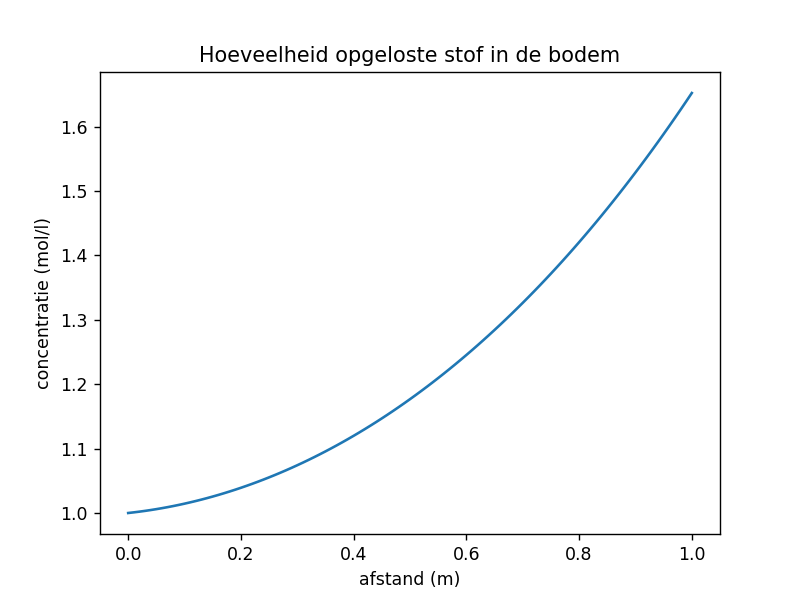

In [9]:
# DEZE OPLOSSING IS NIET CORRECT: HOUDT GEEN REKENING MET V_eind = 0

C0 = 1    # beginconcentratie in mol/l
V0 = 0.1  # beginverandering in mol/l per meter    <----

dx     = 0.01       # stap in meter
eindx  = 1          # na eindx meter

concentratie = []
afstand = []

for x in np.arange(0, eindx, dx):
    # opslag van laatste waarde in lijst
    concentratie.append(C0)
    afstand.append(x)
    V1 = V0 + C0*dx
    C1 = C0 + V0*dx
    # update na elke tijdstap
    C0 = C1
    V0 = V1

# tekenen van de grafiek
fig, ax = plt.subplots()
ax.plot(afstand, concentratie)
ax.set_title( 'Hoeveelheid opgeloste stof in de bodem' )
ax.set_xlabel( 'afstand (m)' )
ax.set_ylabel( 'concentratie (mol/l)' )
plt.show()